#                   Wine Quality - Logistic Regression

## Objective

The purpose is to find the wine quality based on vaious input parameters like fixed acidity, volatile acidity, citric acid, residuals sugars, free sulpher dioxide, total sulpher dioxide, density, pH, sulphates, alcohol, quality

## Data Dictionary

Input variables (based on physicochemical tests) that are involved in training are :

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variables are:

12 - quality (score between 0 and 10)

0 - type (red or white)

### Source of Dataset 

https://www.kaggle.com/rajyellow46/wine-quality 

The dataset was downloaded from the UCI Machine Learning Repository and is made available at the above kaggle page

#  Data Exploration

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Reading the Data

In [2]:
# reading winequalityN.csv file using pandas read_csv which is inside folder called 'data'
df = pd.read_csv('./../Python ML CA  Group/00009---ML-Project/data/winequalityN.csv') 

In [3]:
# Column names and data types
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Number of rows
df.shape[0]

6497

In [5]:
# Number of columns
df.shape[1]

13

In [6]:
# Grouped by wine types
df.groupby('type').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,1597,1598,1598,1599,1599,1599,1599,1599,1597,1597,1599,1599
white,4890,4891,4896,4896,4896,4898,4898,4898,4891,4896,4898,4898


In [7]:
# Grouped by quality scores and wine types
df.groupby(['quality', 'type']).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality type                                                                  
3       red               10                10           10              10   
        white             20                20           20              20   
4       red               53                53           53              53   
        white            163               163          163             163   
5       red              680               681          681             681   
        white           1453              1455         1456            1457   
6       red              637               637          637             638   
        white           2195              2195         2197            2197   
7       red              199               199          199             199   
        white            880               878          880             879   
8       red               18                18           18              18   
        white            174               175          175             175   
9       white              5                 5            5               5   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality type                                                                   
3       red           10                   10                    10       10   
        white         20                   20                    20       20   
4       red           53                   53                    53       53   
        white        162                  163                   163      163   
5       red          681                  681                   681      681   
        white       1457                 1457                  1457     1457   
6       red          638                  638                   638      638   
        white       2197                 2198                  2198     2198   
7       red          199                  199                   199      199   
        white        880                  880                   880      880   
8       red           18                   18                    18       18   
        white        175                  175                   175      175   
9       white          5                    5                     5        5   

                 pH  sulphates  alcohol  
quality type                             
3       red      10         10       10  
        white    20         20       20  
4       red      53         52       53  
        white   163        163      163  
5       red     680        681      681  
        white  1455       1456     1457  
6       red     637        637      638  
        white  2195       2197     2198  
7       red     199        199      199  
        white   878        880      880  
8       red      18         18       18  
        white   175        175      175  
9       white     5          5        5

In [8]:
# Top 5 rows of the data
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Number of samples for different wine types

In [9]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

Number of samples for different quality scores

In [10]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Data Cleaning

Number of Samples for each column

In [11]:
# Getting the number of samples for each column
df.count()

type                    6497
fixed acidity           6487
volatile acidity        6489
citric acid             6494
residual sugar          6495
chlorides               6495
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6488
sulphates               6493
alcohol                 6497
quality                 6497
dtype: int64

The count i.e. number of samples is not uniform across the columns. This indicates that sum of the values in the data are either empty or having Nan values. So Let's get the number of such non empty cell counts for each column as mentioned below

In [12]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

The columns 'fixed acidity', 'volatile acidity', 'citric sugar', 'residual sugar', 'chlorides', 'pH', 'sulphates' have null values in the rows of 10, 8, 3, 2, 2, 9, 4 respectively. Lets replace these cell values with the mean value of their respective columns

## Replacing Nan values with respective column Mean 

Looping through each column item and in each iteration we check whether a column has any null values or not. If a column has null values then we fill that cell value with the mean of the respective column.

In [13]:
# Filling Nan values with mean
for i in df.columns:          # Looping through each column of the dataframe df
    if df[i].isnull().sum() > 0:    # checking if the selected column in the iteration has any null values
        print(i)                             # printing the column name that has atleast one null value
        df[i] = df[i].fillna(df[i].mean())   # Filling the null values with mean of the current column

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
pH
sulphates


The above listed columns had some Nan values. Now, they are having their respective column mean values instead of Nan values. Let's verify if there are any more Nan values as mentioned below

In [14]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no more Nan values in our dataframe as we got response as 0 for each column

In [15]:
df.count()

type                    6497
fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64

Now the number of samples is unique across the columns since we replaced Nan values with mean values

# Data Visualization

## Pearson Correlation Matrix 

Pearson Correlation is a measure of the linear correlation between vaiables X and Y. It is formulated as below

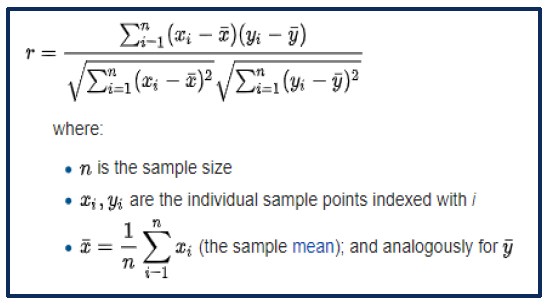

Pearson correlation coefficient is a value between -1 to +1

-1 means total negative correlation

+1 means total positive correlation

0 means no correlation

A Pearson Correlation Matrix can be computed for each
feature w.r.t other features in dataset

The correlation matrix can be established in pandas library by imposing .corr method on the data frame as mentioned below

In [16]:
# Generating the correlation matrix for dataframe df
corr_mat = df.corr(method='pearson')

In [17]:
# Shape of the correlation matrix
corr_mat.shape

(12, 12)

The shape of the correlation matrix is 12x12 since we have a total of 12 numerical columns in the dataset

## Visualizing Pearson Correlation Matrix 

The above generated correlation matrix of shape 12x12 can be visualized using heatmap function in seaborn library and plotted using pyplot package of matplotlib library 

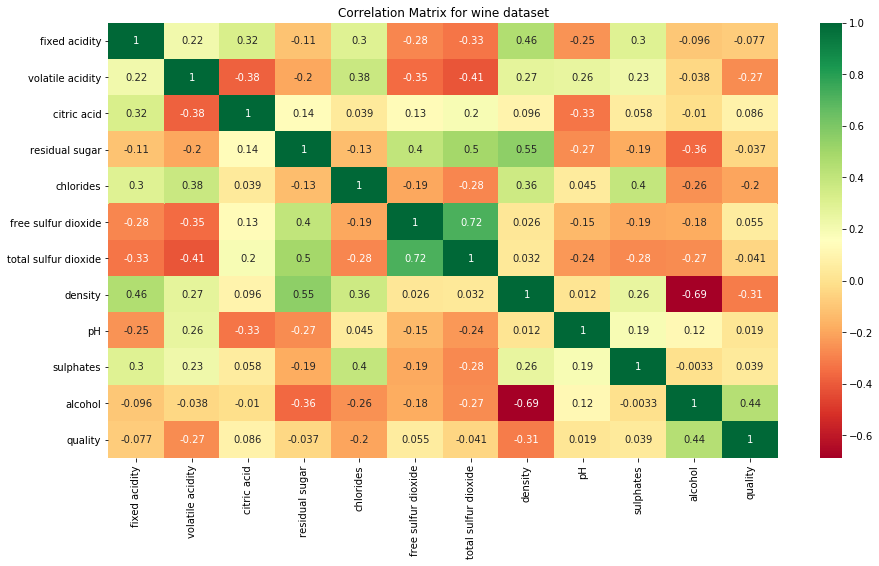

In [18]:
plt.figure(figsize=(15,8))        # Adjusting the figure size to 15 inches x 8 inches
sb.heatmap(corr_mat, annot=True, cmap='RdYlGn') #generating heatmap of correlation matrix with colors asRed, Green and Blue
plt.title('Correlation Matrix for wine dataset') # Giving title as mentioned
plt.show() 

Wine quaity has a higher correlation with alcohol i.e. 0.44. The correlation with density, volatile acidity, chlorides is -0.31, -0.27, -0.2 respectively. The quality label has no significant correlation with other features.

# Model Training - Logistic Regression - label Wine Quality

Lets consider the output label as the quality and the various features provided as the input.

## Adjusting the training and Testing data 

In [19]:
# Adjusting the test size = 0.3 (30%) => training data = 70%
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 1:12], df['quality'], test_size=0.3)
# All the input features are in X_train and X_test, label in Y_train, Y_test
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4148,6.2,0.200,0.25,15.0,0.055,8.0,120.0,0.99767,3.19,0.53,9.6
4810,5.4,0.375,0.40,3.3,0.054,29.0,147.0,0.99482,3.42,0.52,9.1
4613,5.8,0.270,0.20,7.3,0.040,42.0,145.0,0.99442,3.15,0.48,9.8
5004,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3
1007,5.1,0.520,0.06,2.7,0.052,30.0,79.0,0.99320,3.32,0.43,9.3


In [20]:
#Checking the training and testing data shapes
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4547, 11)
(4547,)
(1950, 11)
(1950,)


## Fitting the model

In [21]:
#Triggering Logistic Regression with suitable parameters

In [22]:
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 150, max_iter=10000, dual=False)

In [23]:
# Registering the start and end times to determine the duration of the model fitting
start_time = time.time()
logReg.fit(X_train, Y_train)
end_time = time.time()
quality_duration = end_time-start_time
print('Time taken for fitting model is - ', quality_duration)

Time taken for fitting model is -  46.27446007728577


C:\Users\home\anaconda3\envs\python_AJ\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Testing the model 

The above trained model can be tested by using the X_test predict method 

In [24]:
Y_pred = logReg.predict(X_test) # input = X_test and the predictee output is Y_pred

In [25]:
quality_score = accuracy_score(Y_pred, Y_test)
print('Accuracy score - ', quality_score)

Accuracy score -  0.5379487179487179


In [26]:
print('Error rate - ', 1 - accuracy_score(Y_pred, Y_test))

Error rate -  0.4620512820512821


In [27]:
print(confusion_matrix(Y_test, Y_pred))

[[  0   0   3   4   0   0   0]
 [  0   0  45  25   0   0   0]
 [  0   0 368 262   2   0   0]
 [  0   0 177 626  42   0   0]
 [  0   0  18 256  55   0   0]
 [  0   0   8  42  14   0   0]
 [  0   0   0   2   1   0   0]]


The confusion matrix for the predictions of the model vs the actual values is show cased

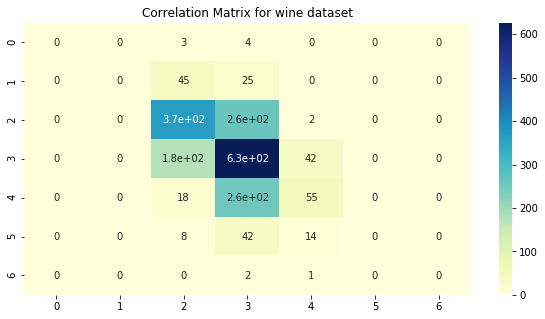

In [28]:
plt.figure(figsize=(10,5))        # Adjusting the figure size to 15 inches x 8 inches
sb.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='YlGnBu') 
#generating heatmap of correlation matrix with colors as Yellow, Green and Blue
plt.title('Correlation Matrix for wine dataset') # Giving title as mentioned
plt.show()

The score is pretty low that our model is more inclined to guessing. This could be due to various reasons. May be reducing the number of dimensions can improve accuracy score. From the Pearson correlation matrix of wine dataset above the following are the most correlated features with wine quality.

Quality with alcohol - 0.44

Quality with density - -0.31

Quality with volatile acidity - -0.27

Quality with chlorides - -0.2


## Readjusting training data with only selected features 

Considering the correlated features as stated above as the input features

In [29]:
X = df[['alcohol', 'density', 'volatile acidity', 'chlorides']]
Y = df['quality']

In [30]:
#Checking the X and Y
print(X.head())
print(Y.head())
print(X.shape)
print(Y.shape)

   alcohol  density  volatile acidity  chlorides
0      8.8   1.0010              0.27      0.045
1      9.5   0.9940              0.30      0.049
2     10.1   0.9951              0.28      0.050
3      9.9   0.9956              0.23      0.058
4      9.9   0.9956              0.23      0.058
0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64
(6497, 4)
(6497,)


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) # adjusting the test size = 30%
# correlated features in X and wine quality in Y

## Refitting the model

In [32]:
#Triggering Logistic Regression with suitable parameters
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 150, max_iter=10000, dual=False)

In [33]:
# Registering the start and end times to determine the duration of the model fitting
start_time = time.time()
logReg.fit(X_train, Y_train)
end_time = time.time()
print('Time taken for fitting model is - ', end_time-start_time)

Time taken for fitting model is -  5.095379114151001


## Retesting the model

The above trained model can be tested by using the X_test predict method

In [34]:
Y_pred = logReg.predict(X_test) # input = X_test and the predictee output is Y_pred
print('Accuracy score - ', accuracy_score(Y_pred, Y_test))

Accuracy score -  0.49948717948717947


In [35]:
print('Error rate - ', 1 - accuracy_score(Y_pred, Y_test))

Error rate -  0.5005128205128205


In [36]:
print(confusion_matrix(Y_test, Y_pred))

[[  0   0   3   2   0   0   0]
 [  0   0  37  24   0   0   0]
 [  0   0 364 273   0   0   0]
 [  0   0 240 577  32   0   0]
 [  0   0  35 282  33   0   0]
 [  0   0   5  29  12   0   0]
 [  0   0   0   1   1   0   0]]


The confusion matrix for the predictions of the model vs the actual values is show cased

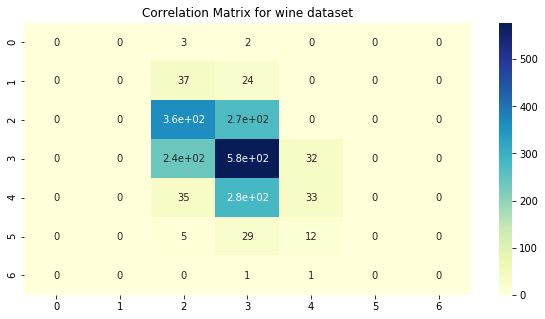

In [37]:
plt.figure(figsize=(10,5))        # Adjusting the figure size to 15 inches x 8 inches
sb.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='YlGnBu') 
#generating heatmap of correlation matrix with colors asRed, Green and Blue
plt.title('Correlation Matrix for wine dataset') # Giving title as mentioned
plt.show() 

Sometimes converting a label into category gives us better model. We can opt for binning our wine quality into categorical range

## Binning the wine quality into groups

The quality score of 1 to 10 of wine need to be grouped to 3 bins for the below ranges

quality group 0 : 1-4

quality group 1 : 4-7

quality group 2 : 7-10

In [38]:
bins = [1,4,7,11] # Adjusting mile stones for range as mentioned above
labels = [0, 1, 2] # adjusting the label output values as per the adjusted values for bins 

In [39]:
# Adding a new column quality_group with the adjusted values of the quality score
df['quality_group'] = pd.cut(df.quality, bins = bins, labels = labels)

A new column quality_group is inserted that records 0 or 1 or 2 based on the score range as mentioned above

In [40]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_group
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [41]:
df.groupby('quality_group').count()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_group,,,,,,,,,,,,,
0,246,246,246,246,246,246,246,246,246,246,246,246,246
1,6053,6053,6053,6053,6053,6053,6053,6053,6053,6053,6053,6053,6053
2,198,198,198,198,198,198,198,198,198,198,198,198,198


The above table represents the number of the samples registered for each quality group

# Model Training - Logistic Regression - label Wine Quality group

Lets consider the output label as the quality group which is binned based on the range of the quality scores. Since the output label is changed we have to modify our Y_train, Y_test and revert back our input X to all the existing input features

In [42]:
# putting all the given 11 features into X
X = df.iloc[:, 1:12]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


In [43]:
# Label is moed to quality group
Y = df['quality_group']
Y

0       1
1       1
2       1
3       1
4       1
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: quality_group, Length: 6497, dtype: category
Categories (3, int64): [0 < 1 < 2]

## Adjusting the Train and Test data

In [44]:
# All the 11 features are considered for the input and the newly created quality group (binned one) is the label

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [46]:
print(X_train.shape)
print(Y_train.shape)

(4547, 11)
(4547,)


In [47]:
print(X_test.shape)
print(Y_test.shape)

(1950, 11)
(1950,)


## Fitting the Model 

In [48]:
#Triggering Logistic Regression with suitable parameters
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 150, max_iter=10000, dual=False)

In [49]:
# Registering the start and end time to determine the duration of the model fitting
start_time = time.time()
logReg.fit(X_train, Y_train)
end_time = time.time()
qualitygroup_duration =  end_time-start_time
print('Time taken for fitting model is - ', qualitygroup_duration)

Time taken for fitting model is -  10.103655576705933


## Testing the model

In [50]:
Y_pred = logReg.predict(X_test) # input = X_test and the predictee output is Y_pred
print(accuracy_score(Y_pred, Y_test))

0.9241025641025641


In [51]:
qualitygroup_score = accuracy_score(Y_pred, Y_test)
print('Accuracy score - ', qualitygroup_score)

Accuracy score -  0.9241025641025641


In [52]:
print('Error rate - ', 1 - accuracy_score(Y_pred, Y_test))

Error rate -  0.07589743589743592


In [53]:
print(confusion_matrix(Y_test, Y_pred))

[[   0   84    0]
 [   0 1802    0]
 [   0   64    0]]


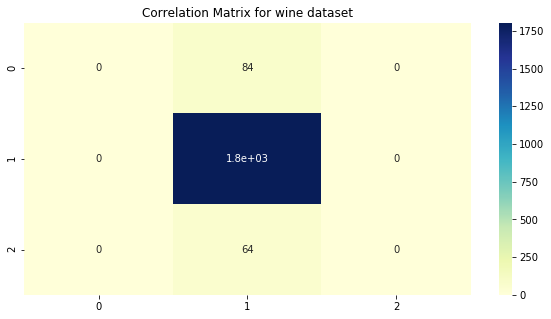

In [54]:
plt.figure(figsize=(10,5))        # Adjusting the figure size to 15 inches x 8 inches
sb.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='YlGnBu') 
#generating heatmap of correlation matrix with colors as Yellow, Green and Blue
plt.title('Correlation Matrix for wine dataset') # Giving title as mentioned
plt.show() 

Binning the quality scores into quality groups definitely helped to improve the acuuracy of our model

# Model Training - Logistic Regression - label Wine type

Lets consider the output label as the wine type along with the provided features as input.

In [55]:
# Adjusting the test size = 0.3 (30%) => training data = 70%
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 1:12], df['type'], test_size=0.3)
# All the input features are in X_train and X_test, label in Y_train, Y_test
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
702,6.6,0.38,0.18,1.20,0.042,20.0,84.0,0.99270,3.22,0.45,10.1
5905,9.1,0.30,0.34,2.00,0.064,12.0,25.0,0.99516,3.26,0.84,11.7
781,7.8,0.29,0.22,9.50,0.056,44.0,213.0,0.99715,3.08,0.61,9.3
677,5.8,0.32,0.38,4.75,0.033,23.0,94.0,0.99100,3.42,0.42,11.8
4793,6.0,0.31,0.32,7.40,0.175,47.0,159.0,0.99520,3.19,0.50,9.4


In [56]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4547, 11)
(4547,)
(1950, 11)
(1950,)


## Fitting the Model 

In [57]:
#Triggering Logistic Regression with suitable parameters
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 150, max_iter=10000, dual=False)

In [58]:
# Registering the start and end time to determine the duration of the model fitting
start_time = time.time()
logReg.fit(X_train, Y_train)
end_time = time.time()
type_duration = end_time-start_time
print('Time taken for fitting model is - ', type_duration)

Time taken for fitting model is -  1.7742557525634766


## Testing the Model

In [59]:
Y_pred = logReg.predict(X_test) # input = X_test and the predictee output is Y_pred
type_score = accuracy_score(Y_pred, Y_test)
print('Accuracy score - ', type_score)

Accuracy score -  0.9825641025641025


In [60]:
print('Error rate - ', 1 - accuracy_score(Y_pred, Y_test))

Error rate -  0.017435897435897463


In [61]:
print(confusion_matrix(Y_test, Y_pred))

[[ 491   22]
 [  12 1425]]


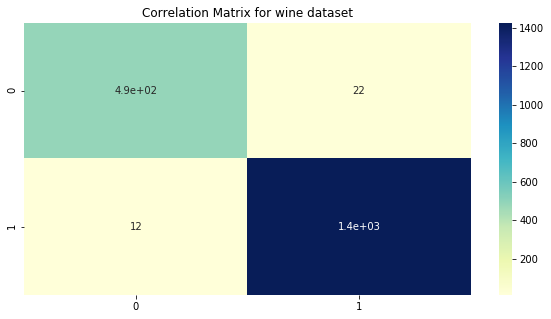

In [62]:
plt.figure(figsize=(10,5))        # Adjusting the figure size to 15 inches x 8 inches
sb.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='YlGnBu') 
#generating heatmap of correlation matrix with colors asRed, Green and Blue
plt.title('Correlation Matrix for wine dataset') # Giving title as mentioned
plt.show() 

# PCA - Principal Component Analysis

Principal Component Analysis is a technique to reduce
features/dimensions of data. It finds principal components that capture the maximum variance within the data. Maximum Variance occurs when data points are most spread out when projected onto a principal component. 

The first principal component (PC1) captures the maximum
variance, with succeeding principal components (PC2,PC3,PC4..) records the remaining variance in the data. The principal components are orthogonal to each other

Before applying PCA to the dataset, we have to standardize the values of each feature to have zero mean and unit variance

In [63]:
# Fetching the input features from the dataset

In [64]:
X = df.iloc[:, 1:12]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


## Normalization

In [65]:
# StandardScaler is imported from sklearn.preprocessing package
# PCA is imported from from sklearn.decomposition package

In [66]:
X = StandardScaler().fit_transform(X) # Normalizing to zero mean and unit variance

In [67]:
# Normalized values
print(X)

[[-0.1671586  -0.4235636   0.28424515 ... -1.35966451 -0.5459591
  -1.41855821]
 [-0.70742728 -0.24123152  0.14652315 ...  0.50804501 -0.27706392
  -0.83161516]
 [ 0.68183504 -0.36278624  0.55968916 ...  0.25901707 -0.6131829
  -0.32852111]
 ...
 [-0.70742728  1.03509307 -1.2995579  ...  1.25512882  1.47075478
   0.42611996]
 [-1.01615224  1.85558744 -1.3684189  ...  2.18898358  1.2018596
  -0.2446721 ]
 [-0.938971   -0.18045416  1.04171618 ...  1.06835787  0.86574062
   0.42611996]]


In [68]:
# Selecting the top 6 components by using n_components = 7
pca = PCA(n_components=7)
X = pca.fit_transform(X)

In [69]:
# The modified new input shape
X.shape

(6497, 7)

The measure of the modified input features can be represeneted by variance ratio of each component and its sum as below

In [70]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.27542041 0.22670389 0.14132792 0.08830461 0.06546648 0.05517059
 0.04759601]
0.8999899125188309


It can be inferred that 89% of the original input data (with 11 features) is now achieved by the new 7 features

With the new dimensions and values of input features let's train our model and test the model performance

# Model Training - Logistic Regression - label Wine Quality

Lets consider the output label as the quality and the new set inputs of reduced dimensions after PCA 

## Adjusting the training and testing data 

In [71]:
# Adjusting the test size = 0.3 (30%) => training data = 70%
X_train, X_test, Y_train, Y_test = train_test_split(X, df['quality'], test_size=0.3)
# All the input features are in X_train and X_test, label in Y_train, Y_test
X_train

array([[-1.59620992,  1.54858846, -0.70669476, ..., -1.36825864,
         0.3198992 , -0.67664807],
       [ 0.98432401, -0.28135483, -0.18368423, ..., -0.81482437,
        -1.1028282 , -0.01164325],
       [ 1.30141855,  0.0934664 , -0.84303068, ..., -0.16348316,
        -0.07479037,  0.34582   ],
       ...,
       [ 0.75073453, -1.95786285, -1.18791724, ...,  0.30038808,
        -0.03544887, -0.35344661],
       [-2.17188601,  2.44461338,  2.19423083, ..., -0.90162931,
        -0.20926178, -0.02733117],
       [ 0.54913784, -0.28467029, -0.12705214, ..., -0.25539304,
        -0.22028801,  0.3269223 ]])

In [72]:
#Checking the training and testing data shapes
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4547, 7)
(4547,)
(1950, 7)
(1950,)


## Fitting the model 

In [73]:
#Triggering Logistic Regression with suitable parameters
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 150, max_iter=10000, dual=False)

In [74]:
# Registering the start and end times to determine the duration of the model fitting
start_time = time.time()
logReg.fit(X_train, Y_train)
end_time = time.time()
qualitypca_duration = end_time-start_time
print('Time taken for fitting model is - ', qualitypca_duration)

Time taken for fitting model is -  0.4837076663970947


## Testing the model

The above trained model can be tested by using the X_test predict method 

In [75]:
Y_pred = logReg.predict(X_test) # input = X_test and the predictee output is Y_pred
qualitypca_score = accuracy_score(Y_pred, Y_test)
print('Accuracy score - ', qualitypca_score)

Accuracy score -  0.5256410256410257


The accuracy score is not improved for the label wine quality even after the dimentionality reduction using PCA

In [76]:
print('Error rate - ', 1 - accuracy_score(Y_pred, Y_test))
print(confusion_matrix(Y_test, Y_pred))

Error rate -  0.47435897435897434
[[  0   0   4   2   1   1   0]
 [  0   0  31  34   1   0   0]
 [  0   0 368 270   4   0   0]
 [  0   0 205 584  60   0   0]
 [  0   0  24 241  73   0   0]
 [  0   0   6  25  13   0   0]
 [  0   0   0   0   3   0   0]]


The confusion matrix for the predictions of the model vs the actual values is show cased

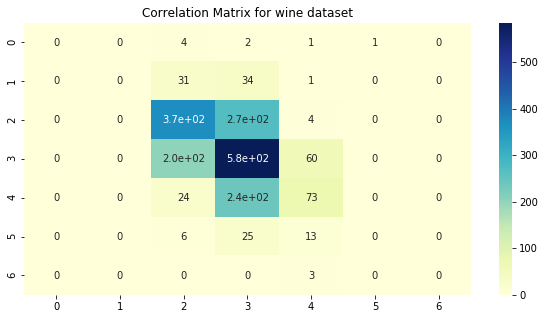

In [77]:
plt.figure(figsize=(10,5))        # Adjusting the figure size to 15 inches x 8 inches
sb.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='YlGnBu') #generating heatmap of correlation matrix with colors asRed, Green and Blue
plt.title('Correlation Matrix for wine dataset') # Giving title as mentioned
plt.show()

# Model Training - Logistic Regression - label Wine Quality group
Lets consider the output label as the quality group which is binned based on the range of the quality scores and the newly obtained dimention reduced PCA input as X. Since the output label is changed we have to modify our Y_train, Y_test and revert back our input X to newly generated principal components

## Adjusting the training and testing data

In [78]:
# Adjusting the test size = 0.3 (30%) => training data = 70%
X_train, X_test, Y_train, Y_test = train_test_split(X, df['quality_group'], test_size=0.3)
# All the input features are in X_train and X_test, label in Y_train, Y_test
X_train

array([[ 2.17132268,  0.82289041, -0.18910954, ..., -0.31478249,
        -0.37493053, -0.76341487],
       [ 1.76591695,  2.36000073, -1.33338311, ...,  1.36754778,
         0.6483537 ,  0.59305823],
       [ 0.38487743, -0.41994645, -0.97465842, ..., -1.40933506,
        -0.60701325,  0.45627125],
       ...,
       [ 0.12339341,  0.96639027, -1.94742034, ...,  1.49795966,
        -0.2029991 ,  0.15870866],
       [-3.18237582,  2.15516382,  1.11043036, ..., -0.01663396,
         1.84778131, -0.23670252],
       [ 0.61403738, -2.76427794,  1.36964389, ..., -0.50225002,
         0.45909071,  0.3323326 ]])

In [79]:
#Checking the training and testing data shapes
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4547, 7)
(4547,)
(1950, 7)
(1950,)


## Fitting the model

In [80]:
#Triggering Logistic Regression with suitable parameters
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 150, max_iter=10000, dual=False)

In [81]:
# Registering the start and end times to determine the duration of the model fitting
start_time = time.time()
logReg.fit(X_train, Y_train)
end_time = time.time()
qualitygrouppca_duration = end_time-start_time
print('Time taken for fitting model is - ', qualitygrouppca_duration)

Time taken for fitting model is -  0.07280468940734863


## Testing the model

In [82]:
Y_pred = logReg.predict(X_test) # input = X_test and the predictee output is Y_pred
qualitygrouppca_score = accuracy_score(Y_pred, Y_test)
print('Accuracy score - ', qualitygrouppca_score)

Accuracy score -  0.9302564102564103


The accuracy score with PCA is close to 94% comapred to 92.7% accuracy score without PCA i.e.

It can be infered with 11 features we got 92.7 % accuracy with fitting duration as 11.47 seconds where as 
with PCA reduction only 7 principal components got 93.7% accuracy with fitting duration as 0.08 seconds

In [83]:
print('Error rate - ', 1 - accuracy_score(Y_pred, Y_test))

Error rate -  0.06974358974358974


In [84]:
print(confusion_matrix(Y_test, Y_pred))

[[   1   81    0]
 [   0 1813    0]
 [   0   55    0]]


The confusion matrix for the predictions of the model vs the actual values is show cased

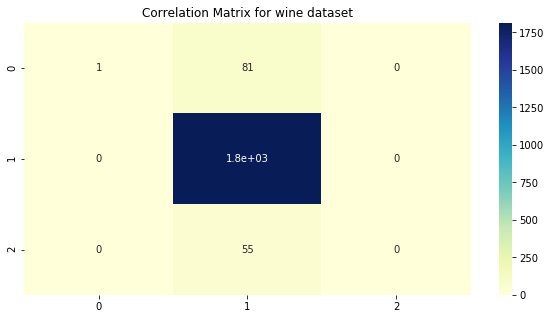

In [85]:
plt.figure(figsize=(10,5))        # Adjusting the figure size to 15 inches x 8 inches
sb.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='YlGnBu') #generating heatmap of correlation matrix with colors asRed, Green and Blue
plt.title('Correlation Matrix for wine dataset') # Giving title as mentioned
plt.show()

# Model Training - Logistic Regression - label Wine type
Lets consider the output label as the wine type along with the principal components as input features.

## Adjusting the training and testing data

In [86]:
# Adjusting the test size = 0.3 (30%) => training data = 70%
X_train, X_test, Y_train, Y_test = train_test_split(X, df['type'], test_size=0.3)
# All the input features are in X_train and X_test, label in Y_train, Y_test
X_train

array([[ 1.67180379,  1.33859198, -1.75680045, ...,  0.95738497,
        -0.49936133,  1.10467785],
       [ 0.69620534, -1.29359636,  0.01236518, ..., -0.21444638,
        -0.60102956, -0.35941955],
       [ 1.9562534 ,  1.11751862,  0.91290143, ..., -0.18624063,
         1.12682851, -0.93300539],
       ...,
       [-0.56762187, -0.42164944, -0.12413814, ...,  0.81018935,
        -0.66051114,  0.66539154],
       [ 2.24150256,  0.70656236, -0.05944208, ..., -0.4149102 ,
         0.93192257, -0.30483762],
       [ 4.23880782,  3.23714786, -2.3891484 , ...,  0.61681763,
         1.03408508, -2.12057358]])

In [87]:
#Checking the training and testing data shapes
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4547, 7)
(4547,)
(1950, 7)
(1950,)


## Fitting the model

In [88]:
#Triggering Logistic Regression with suitable parameters
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 150, max_iter=10000, dual=False)

In [89]:
# Registering the start and end times to determine the duration of the model fitting
start_time = time.time()
logReg.fit(X_train, Y_train)
end_time = time.time()
typepca_duration = end_time-start_time
print('Time taken for fitting model is - ', typepca_duration)

Time taken for fitting model is -  0.050862789154052734


## Testing the model

In [90]:
Y_pred = logReg.predict(X_test) # input = X_test and the predictee output is Y_pred
typepca_score = accuracy_score(Y_pred, Y_test)
print('Accuracy score - ', typepca_score)

Accuracy score -  0.9866666666666667


In [91]:
print('Error rate - ', 1 - accuracy_score(Y_pred, Y_test))

Error rate -  0.013333333333333308


In [92]:
print(confusion_matrix(Y_test, Y_pred))

[[ 454   10]
 [  16 1470]]


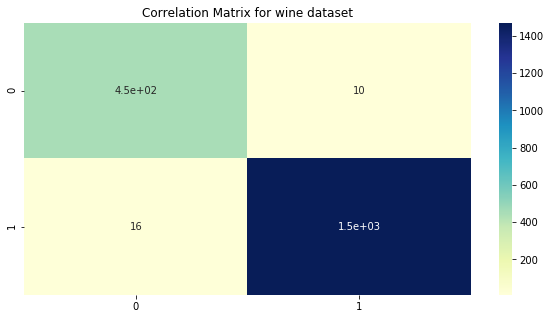

In [93]:
plt.figure(figsize=(10,5))        # Adjusting the figure size to 15 inches x 8 inches
sb.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='YlGnBu') #generating heatmap of correlation matrix with colors asRed, Green and Blue
plt.title('Correlation Matrix for wine dataset') # Giving title as mentioned
plt.show()

# Sensitivity Graphs

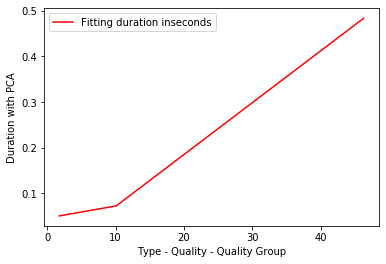

In [112]:
duration = [type_duration, qualitygroup_duration, quality_duration]
pca_duration = [typepca_duration, qualitygrouppca_duration, qualitypca_duration]
plt.plot(duration,  pca_duration, label = 'Fitting duration inseconds', color = 'red')
plt.xlabel('Type - Quality - Quality Group')
plt.ylabel('Duration with PCA')
plt.legend()
plt.show()

PCA definitely helped in lowering the fitting duration drastically to less than a second for all set of output values like Type, Quality, Quality group

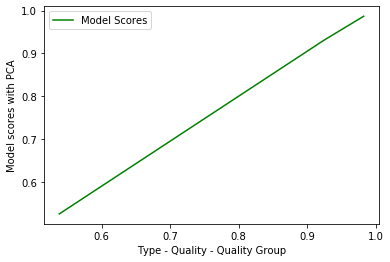

In [113]:
score = [type_score, qualitygroup_score, quality_score]
pca_score = [typepca_score, qualitygrouppca_score, qualitypca_score]
plt.plot(score,  pca_score, label = 'Model Scores', color = 'green')
plt.xlabel('Type - Quality - Quality Group')
plt.ylabel('Model scores with PCA')
plt.legend()
plt.show()

The usage of PCA is not fruitful for logistic regression with various output labels like Type, Quality, Quality group

# K Means

In [95]:
X = df.iloc[0:2000, 6:8].values
X

array([[ 45., 170.],
       [ 14., 132.],
       [ 30.,  97.],
       ...,
       [ 51., 170.],
       [ 51., 170.],
       [ 32., 197.]])

In [96]:
from sklearn.cluster import KMeans

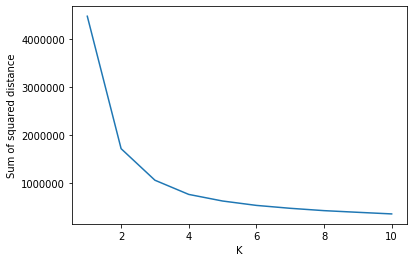

In [97]:
ssd = []
for k in range(1,11):
    km = KMeans(n_clusters=k, init = 'k-means++')
    km.fit(X)
    ssd.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.plot(range(1,11), ssd)

According to the elbow technique the optimum value of k is 3

In [98]:
kmeans = KMeans(n_clusters = 3)
quality_group = kmeans.fit_predict(X)

In [99]:
quality_group

array([0, 0, 2, ..., 0, 0, 1])

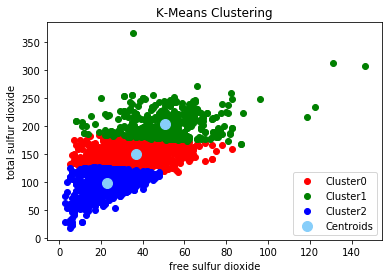

In [100]:
#2D PLot
colors = 'rgbkcmy'
for i in np.unique(quality_group):
    plt.scatter(X[quality_group==i, 0], X[quality_group == i, 1], color=colors[i], label='Cluster' + str(i))
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100,
           c = 'lightskyblue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(df.columns[6])
plt.ylabel(df.columns[7])
plt.show()

IndexError: index 4 is out of bounds for axis 1 with size 2

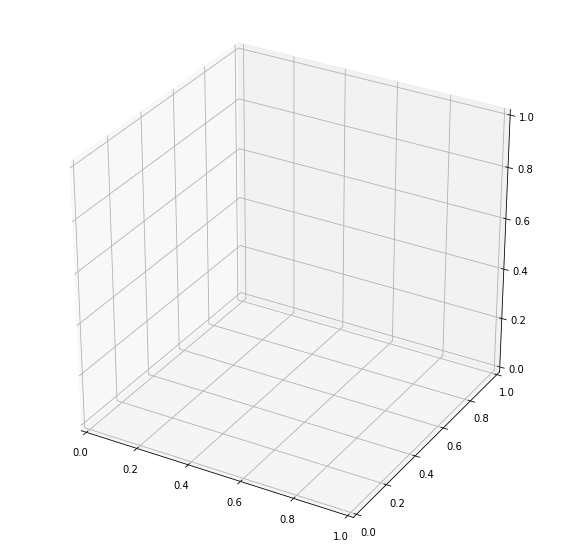

In [101]:
from mpl_toolkits.mplot3d import Axes3D
#3D plot
fig = plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
for i in np.unique(quality_group):
    ax.scatter3D(X[quality_group==i, 0],
                X[quality_group==i, 1],
                X[quality_group==i, 4],
                color=colors[i], 
                label = 'quality_group '+str(i))
ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[2])
ax.set_zlabel(df.columns[5])

plt.legend()
plt.title('K-Means Clustering')
plt.show()

In [ ]:
# Fetching the outpur features
Y = df['quality_group']
Y.head()

# DBSCAN

In [ ]:
X = df.iloc[:,1:12]
X.head()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 3, min_samples = 50)

In [ ]:
quality_groups = dbscan.fit_predict(X)

In [ ]:
print(quality_groups.max())

In [ ]:
colors = 'rgbkcmy'
for i in np.unique(quality_groups):
    label = 'Outliner' if i == -1 else 'quality_groups' + str(i)
    plt.scatter(X[quality_groups == i, 0], X[quality_groups == i, 1], color=colors[i], label = label)

plt.legend()
plt.show()